In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read all the game results of Croquet from 1985-2017
file = pd.ExcelFile('gameResults1.xlsx')  
df1 = pd.read_excel(file)  

In [3]:
df1

,Winner,Loser,No_of_Game1,No_of_Game2,Event_Class,WinrateOfWinner,WinrateOfWinner_g,WinrateOfLoser,WinrateOfLoser_g
0,210,257,1,1,2,0,0,0,0
1,326,282,1,1,2,0,0,0,0
2,324,283,1,1,2,0,0,0,0
3,338,225,1,1,2,0,0,0,0
4,201,306,1,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
352805,3039,3071,209,151,2,0,0,0,0
352806,3693,3048,178,185,2,0,0,0,0
352807,3290,2894,380,306,2,0,0,0,0
352808,4140,2580,31,389,2,0,0,0,0


In [4]:
#Name of players and initial index/grade
file2 = pd.ExcelFile('inigrade.xlsx')  
df2 = pd.read_excel(file2)  
df2 = df2.rename(index = lambda x: x + 1)

In [5]:
df2

,Name,ini_index,curr_index,curr_grade
1,Adam AHM [S],1650,1650,1650
2,Adlard RE,1750,1750,1750
3,Aiton KMH,2360,2360,2360
4,Aldridge WO,2200,2200,2200
5,Allim RM,1900,1900,1900
...,...,...,...,...
4216,Holt M [C],1300,1300,1300
4217,Bingham A,1300,1300,1300
4218,Machell A,1300,1300,1300
4219,Haydon P,1300,1300,1300


In [6]:
#update index/grades after running the result of each game(the croquet grading system(CG))
def update_grade_CG(df,df_e,idx_p1,idx_p2,game):
    class_factor = [60,50,40]
    #difference ranking index before each game
    difference = df['curr_index'].iloc[idx_p1-1] - df['curr_index'].iloc[idx_p2-1]
    #decide class factor by class of event
    if df_e['Event_Class'].iloc[game] == 1:
        cf = class_factor[0]
    elif df_e['Event_Class'].iloc[game] == 2:
        cf = class_factor[1]
    elif df_e['Event_Class'].iloc[game] == 3:
        cf = class_factor[2]
    #update new index to df2
    df['curr_index'].iloc[idx_p1-1] = df['curr_index'].iloc[idx_p1-1] + cf/(1 + 10**(difference/500))
    df['curr_index'].iloc[idx_p2-1] = df['curr_index'].iloc[idx_p2-1] - cf/(1 + 10**(difference/500))
    #decide alpha
    alpha_w = (df['curr_index'].iloc[idx_p1-1]-1000)/10000 +0.8
    alpha_l = (df['curr_index'].iloc[idx_p2-1]-1000)/10000 +0.8
    #limit the value of alpha in a interval（0.9-0.97）
    if alpha_w < 0.9:
        alpha_w = 0.9
    elif alpha_w > 0.97:
        alpha_w = 0.97
    if alpha_l < 0.9:
        alpha_l = 0.9
    elif alpha_l > 0.97:
        alpha_l = 0.97
    #import smoothing system(grade update)
    df['curr_grade'].iloc[idx_p1-1] = df['curr_grade'].iloc[idx_p1-1]*alpha_w + df['curr_index'].iloc[idx_p1-1]*(1-alpha_w)
    df['curr_grade'].iloc[idx_p2-1] = df['curr_grade'].iloc[idx_p2-1]*alpha_l + df['curr_index'].iloc[idx_p2-1]*(1-alpha_l)

    return

In [7]:
#Expected score of winners before each game(index system)
def prediction_CG(df,idx_p1,idx_p2):
    winrate = 1/(1+10**((df['curr_index'].iloc[idx_p2-1] - df['curr_index'].iloc[idx_p1-1])/500))
    return winrate

In [8]:
#Expected score of winners before each game(grade system)
def prediction_g_CG(df,idx_p1,idx_p2):
    winrate_g = 1/(1+10**((df['curr_grade'].iloc[idx_p2-1] - df['curr_grade'].iloc[idx_p1-1])/500))
    return winrate_g

In [9]:
#Running through all existing games
for x in range(len(df1)):
    #winrate of winner before each game
    winrate = prediction_CG(df2,df1['Winner'].iloc[x],df1['Loser'].iloc[x])
    winrate_g = prediction_g_CG(df2,df1['Winner'].iloc[x],df1['Loser'].iloc[x])
    df1['WinrateOfWinner'].iloc[x] = winrate
    df1['WinrateOfWinner_g'].iloc[x] = winrate_g
    df1['WinrateOfLoser'].iloc[x] = 1-winrate
    df1['WinrateOfLoser_g'].iloc[x] = 1-winrate_g
    update_grade_CG(df2,df1,df1['Winner'].iloc[x],df1['Loser'].iloc[x],x)



C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\1762590406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WinrateOfWinner_g'].iloc[x] = winrate_g
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\1762590406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\1762590406.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WinrateO

In [10]:
df1

,Winner,Loser,No_of_Game1,No_of_Game2,Event_Class,WinrateOfWinner,WinrateOfWinner_g,WinrateOfLoser,WinrateOfLoser_g
0,210,257,1,1,2,0.223845,0.223845,0.776155,0.776155
1,326,282,1,1,2,0.751241,0.751241,0.248759,0.248759
2,324,283,1,1,2,0.696129,0.696129,0.303871,0.303871
3,338,225,1,1,2,0.666139,0.666139,0.333861,0.333861
4,201,306,1,1,2,0.883528,0.883528,0.116472,0.116472
...,...,...,...,...,...,...,...,...,...
352805,3039,3071,209,151,2,0.762519,0.749047,0.237481,0.250953
352806,3693,3048,178,185,2,0.430918,0.510647,0.569082,0.489353
352807,3290,2894,380,306,2,0.551150,0.539917,0.448850,0.460083
352808,4140,2580,31,389,2,0.605308,0.563990,0.394692,0.436010


In [11]:
df2

,Name,ini_index,curr_index,curr_grade
1,Adam AHM [S],1650,1430.914294,1547.605071
2,Adlard RE,1750,1797.754030,1770.231443
3,Aiton KMH,2360,2347.870411,2400.324159
4,Aldridge WO,2200,2175.854979,2243.752660
5,Allim RM,1900,1845.295316,1876.981888
...,...,...,...,...
4216,Holt M [C],1300,1232.692385,1278.859922
4217,Bingham A,1300,1283.262572,1305.552010
4218,Machell A,1300,1332.373188,1310.441086
4219,Haydon P,1300,1284.068387,1307.775594


In [12]:
#Ignorance score under Categorical Variable
def ignorance(observed,prediction):
    n = len(observed)
    score = np.sum(-np.log(prediction))/n
    return score

In [13]:
#Ignorance score for index in CG
log_allidx = ignorance(df1['Winner'],df1['WinrateOfWinner'])

In [14]:
#Ignorance for grade in CG
log_allgrade = ignorance(df1['Winner'],df1['WinrateOfWinner_g'])

In [15]:
#Score difference of Ignorance score between index and grade
ignorance(df1['Winner'],df1['WinrateOfWinner'])-ignorance(df1['Winner'],df1['WinrateOfWinner_g'])

-0.003440883188560395

In [16]:
#Brier score under Categorical Variable
def brier(observed,prediction):
    #verification in this case is always 1
    n = len(observed)
    score = np.sum((1-prediction)**2)/n
    return score

In [17]:
#Brier score for index in CG
brier_allidx = brier(df1['Winner'],df1['WinrateOfWinner'])

In [18]:
#Brier score for grade in CG
brier_allgrade = brier(df1['Winner'],df1['WinrateOfWinner_g'])

In [19]:
#Prediction Accuracy
acc_allidx = 0
acc_allgrade = 0
for x in range(len(df1)):
    if df1['WinrateOfWinner'].iloc[x] > 0.5:
        acc_allidx = acc_allidx + 1
    if df1['WinrateOfWinner_g'].iloc[x] > 0.5:
        acc_allgrade = acc_allidx + 1
pred_allidx = acc_allidx/len(df1)
pred_allgrade = acc_allgrade/len(df1)
pred_allidx,pred_allgrade

(0.6969076840225618, 0.6969105184093422)

In [20]:
#IG30
df3 = pd.read_excel(file)
df4 = pd.read_excel(file2) 

In [21]:
df3

,Winner,Loser,No_of_Game1,No_of_Game2,Event_Class,WinrateOfWinner,WinrateOfWinner_g,WinrateOfLoser,WinrateOfLoser_g
0,210,257,1,1,2,0,0,0,0
1,326,282,1,1,2,0,0,0,0
2,324,283,1,1,2,0,0,0,0
3,338,225,1,1,2,0,0,0,0
4,201,306,1,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
352805,3039,3071,209,151,2,0,0,0,0
352806,3693,3048,178,185,2,0,0,0,0
352807,3290,2894,380,306,2,0,0,0,0
352808,4140,2580,31,389,2,0,0,0,0


In [22]:
df4

,Name,ini_index,curr_index,curr_grade
0,Adam AHM [S],1650,1650,1650
1,Adlard RE,1750,1750,1750
2,Aiton KMH,2360,2360,2360
3,Aldridge WO,2200,2200,2200
4,Allim RM,1900,1900,1900
...,...,...,...,...
4215,Holt M [C],1300,1300,1300
4216,Bingham A,1300,1300,1300
4217,Machell A,1300,1300,1300
4218,Haydon P,1300,1300,1300


In [23]:
def update_grade_IG30(df,idx_p1,idx_p2):
    #difference ranking index before each game
    difference = df['curr_index'].iloc[idx_p1-1] - df['curr_index'].iloc[idx_p2-1]
    cf = 30
    #update new index to df4
    df['curr_index'].iloc[idx_p1-1] = df['curr_index'].iloc[idx_p1-1] + cf/(1 + 10**(difference/500))
    df['curr_index'].iloc[idx_p2-1] = df['curr_index'].iloc[idx_p2-1] - cf/(1 + 10**(difference/500))
    return

In [24]:
#Expected score of winners before each game(IG30)
def prediction_IG30(df, idx_p1,idx_p2):
    winrate = 1/(1+10**((df['curr_index'].iloc[idx_p2-1] - df['curr_index'].iloc[idx_p1-1])/500))
    return winrate

In [25]:
#Running through all existing games
for x in range(len(df3)):
    #winrate of winner before each game
    winrate = prediction_IG30(df4,df3['Winner'].iloc[x],df3['Loser'].iloc[x])
    df3['WinrateOfWinner'].iloc[x] = winrate
    df3['WinrateOfLoser'].iloc[x] = 1-winrate
    update_grade_IG30(df4,df3['Winner'].iloc[x],df3['Loser'].iloc[x])

C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\3137842129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WinrateOfLoser'].iloc[x] = 1-winrate


In [26]:
#Ignorance score for index in IG30
log_allIG30 = ignorance(df3['Winner'],df3['WinrateOfWinner'])

In [27]:
#Brier score for index in IG30
brier_allIG30 = brier(df3['Winner'],df3['WinrateOfWinner'])

In [28]:
#Accuracy of prediction
acc_allIG30 = 0
for x in range(len(df3)):
    if df3['WinrateOfWinner'].iloc[x] > 0.5:
        acc_allIG30 = acc_allIG30 + 1
pred_IG30 = acc_allIG30/len(df3)
pred_IG30

0.6979507383577563

In [29]:
#High-level（CG）(Any one of the players have index/grade > 2000) （df5 and df6）
#CG
df5 = pd.read_excel(file)
df6 = pd.read_excel(file2) 

In [30]:
HL_idx = []
HL_grade = []

In [31]:
for x in range(len(df5)):
    #winrate of winner before each game
    winrate = prediction_CG(df6,df5['Winner'].iloc[x],df5['Loser'].iloc[x])
    winrate_g = prediction_g_CG(df6,df5['Winner'].iloc[x],df5['Loser'].iloc[x])
    df5['WinrateOfWinner'].iloc[x] = winrate
    df5['WinrateOfWinner_g'].iloc[x] = winrate_g
    df5['WinrateOfLoser'].iloc[x] = 1-winrate
    df5['WinrateOfLoser_g'].iloc[x] = 1-winrate_g
    if df6['curr_index'].iloc[df5['Winner'].iloc[x]-1] >= 2000 or df6['curr_index'].iloc[df5['Loser'].iloc[x]-1] >= 2000:
          HL_idx.append(df5['WinrateOfWinner'].iloc[x])

    if df6['curr_grade'].iloc[df5['Winner'].iloc[x]-1] >= 2000 or df6['curr_grade'].iloc[df5['Loser'].iloc[x]-1] >= 2000:
          HL_grade.append(df5['WinrateOfWinner_g'].iloc[x])
    update_grade_CG(df6,df5,df5['Winner'].iloc[x],df5['Loser'].iloc[x],x)


C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\2508740237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['WinrateOfWinner_g'].iloc[x] = winrate_g
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\2508740237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\2508740237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['WinrateO

In [32]:
HL_log_idx = 0
HL_log_grade = 0
HL_brier_idx = 0
HL_brier_grade = 0

In [33]:
#log score for high level with index
for x in range(len(HL_idx)):
    HL_log_idx = HL_log_idx - np.log(HL_idx[x])
#log score for high level with grade
for x in range(len(HL_grade)):
    HL_log_grade = HL_log_grade - np.log(HL_grade[x])

In [34]:
log_HLidx = HL_log_idx/len(HL_idx)
log_HLgrade = HL_log_grade/len(HL_grade)

In [35]:
#brier score for high level with index
for x in range(len(HL_idx)):
    HL_brier_idx = HL_brier_idx + (1-HL_idx[x])**2

#brier score for high level with grade
for x in range(len(HL_grade)):
    HL_brier_grade = HL_brier_grade + (1-HL_grade[x])**2

In [36]:
brier_HLidx = HL_brier_idx/len(HL_idx)
brier_HLgrade = HL_brier_grade/len(HL_grade)

In [37]:
#Accuracy of Prediction
acc_HLidx = 0
acc_HLgrade = 0
for x in range(len(HL_idx)):
    if HL_idx[x] > 0.5:
        acc_HLidx = acc_HLidx + 1
for x in range(len(HL_grade)):
    if HL_grade[x] > 0.5:
        acc_HLgrade = acc_HLgrade + 1

pred_HLidx = acc_HLidx/len(HL_idx)
pred_HLgrade = acc_HLgrade/len(HL_grade)
pred_HLidx,pred_HLgrade

(0.7305983460353495, 0.7305610906042096)

In [38]:
#High-level（IG30）(Any one of the players have index/grade > 2000) （df7 and df8）
#IG30
df7 = pd.read_excel(file)
df8 = pd.read_excel(file2) 

In [39]:
HL_IG30 = []

In [40]:
for x in range(len(df7)):
    #winrate of winner before each game
    winrate = prediction_IG30(df8,df7['Winner'].iloc[x],df7['Loser'].iloc[x])
    df7['WinrateOfWinner'].iloc[x] = winrate
    df7['WinrateOfLoser'].iloc[x] = 1-winrate
    update_grade_IG30(df8,df7['Winner'].iloc[x],df7['Loser'].iloc[x])

    if df8['curr_index'].iloc[df7['Winner'].iloc[x]-1] >= 2000 or df8['curr_index'].iloc[df7['Loser'].iloc[x]-1] >= 2000:
          HL_IG30.append(df7['WinrateOfWinner'].iloc[x])
    update_grade_IG30(df8,df7['Winner'].iloc[x],df7['Loser'].iloc[x])

C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\830810023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\964714645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curr_index'].iloc[idx_p1-1] = df['curr_index'].iloc[idx_p1-1] + cf/(1 + 10**(difference/500))


In [41]:
HL_log_IG30 = 0
HL_brier_IG30 = 0

In [42]:
#log score for high level with IG30
for x in range(len(HL_IG30)):
    HL_log_IG30 = HL_log_IG30 - np.log(HL_IG30[x])

In [43]:
log_HLIG30 = HL_log_IG30/len(HL_IG30)

In [44]:
#brier score for high level with IG30
for x in range(len(HL_IG30)):
    HL_brier_IG30 = HL_brier_IG30 + (1-HL_IG30[x])**2

In [45]:
brier_HLIG30 = HL_brier_IG30/len(HL_IG30)

In [46]:
#Accuracy of Prediction
acc_HLIG30 = 0
for x in range(len(HL_IG30)):
    if HL_IG30[x] > 0.5:
        acc_HLIG30 = acc_HLIG30 + 1
pred_HLIG30 = acc_HLIG30/len(HL_IG30)
pred_HLIG30

0.7378310029886931

In [47]:
#Game frequency of player(CG)（above 20 or 50 or 100）（df9 df10）
df9 = pd.read_excel(file)
df10 = pd.read_excel(file2) 

In [48]:
#game frequency 20 50 100
fre20_idx = []
fre50_idx = []
fre100_idx = []
fre20_grade = []
fre50_grade = []
fre100_grade = []

In [49]:
for x in range(len(df9)):
    #winrate of winner before each game
    winrate = prediction_CG(df10,df9['Winner'].iloc[x],df9['Loser'].iloc[x])
    winrate_g = prediction_g_CG(df10,df9['Winner'].iloc[x],df9['Loser'].iloc[x])
    df9['WinrateOfWinner'].iloc[x] = winrate
    df9['WinrateOfWinner_g'].iloc[x] = winrate_g
    df9['WinrateOfLoser'].iloc[x] = 1-winrate
    df9['WinrateOfLoser_g'].iloc[x] = 1-winrate_g
    
    #determine whether the game frequency meets the requirement
    if df9['No_of_Game1'].iloc[x]>= 20 or df9['No_of_Game2'].iloc[x]>= 20:
          fre20_idx.append(df9['WinrateOfWinner'].iloc[x])
          fre20_grade.append(df9['WinrateOfWinner_g'].iloc[x])

    if df9['No_of_Game1'].iloc[x]>= 50 or df9['No_of_Game2'].iloc[x]>= 50:
          fre50_idx.append(df9['WinrateOfWinner'].iloc[x])
          fre50_grade.append(df9['WinrateOfWinner_g'].iloc[x])

    if df9['No_of_Game1'].iloc[x]>= 100 or df9['No_of_Game2'].iloc[x]>= 100:
          fre100_idx.append(df9['WinrateOfWinner'].iloc[x])
          fre100_grade.append(df9['WinrateOfWinner_g'].iloc[x])

    update_grade_CG(df10,df9,df9['Winner'].iloc[x],df9['Loser'].iloc[x],x)

C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\4287786121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['WinrateOfWinner_g'].iloc[x] = winrate_g
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\4287786121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\4287786121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['WinrateO

In [50]:
fre20_log_idx = 0
fre50_log_idx = 0
fre100_log_idx = 0
fre20_log_grade = 0
fre50_log_grade = 0
fre100_log_grade = 0

In [51]:
#log score for frequency with index
for x in range(len(fre20_idx)):
    fre20_log_idx = fre20_log_idx - np.log(fre20_idx[x])
for x in range(len(fre50_idx)):
    fre50_log_idx = fre50_log_idx - np.log(fre50_idx[x])
for x in range(len(fre100_idx)):
    fre100_log_idx = fre100_log_idx - np.log(fre100_idx[x])

In [52]:
#log score for frequency with grade
for x in range(len(fre20_grade)):
    fre20_log_grade = fre20_log_grade - np.log(fre20_grade[x])
for x in range(len(fre50_grade)):
    fre50_log_grade = fre50_log_grade - np.log(fre50_grade[x])
for x in range(len(fre100_grade)):
    fre100_log_grade = fre100_log_grade - np.log(fre100_grade[x])

In [53]:
log_fre20idx = fre20_log_idx/len(fre20_idx)
log_fre50idx = fre50_log_idx/len(fre50_idx)
log_fre100idx = fre100_log_idx/len(fre100_idx)

In [54]:
log_fre20grade = fre20_log_grade/len(fre20_grade)
log_fre50grade = fre50_log_grade/len(fre50_grade)
log_fre100grade = fre100_log_grade/len(fre100_grade)

In [55]:
fre20_brier_idx = 0
fre50_brier_idx = 0
fre100_brier_idx = 0
fre20_brier_grade = 0
fre50_brier_grade = 0
fre100_brier_grade = 0

In [56]:
#brier score for frequency with index
for x in range(len(fre20_idx)):
   fre20_brier_idx =fre20_brier_idx + (1-fre20_idx[x])**2
for x in range(len(fre50_idx)):
   fre50_brier_idx =fre50_brier_idx + (1-fre50_idx[x])**2
for x in range(len(fre100_idx)):
   fre100_brier_idx =fre100_brier_idx + (1-fre100_idx[x])**2

In [57]:
#brier score for frequency with grade
for x in range(len(fre20_grade)):
   fre20_brier_grade =fre20_brier_grade + (1-fre20_grade[x])**2
for x in range(len(fre50_grade)):
   fre50_brier_grade =fre50_brier_grade + (1-fre50_grade[x])**2
for x in range(len(fre100_grade)):
   fre100_brier_grade =fre100_brier_grade + (1-fre100_grade[x])**2

In [58]:
brier_fre20idx = fre20_brier_idx/len(fre20_idx)
brier_fre50idx = fre50_brier_idx/len(fre50_idx)
brier_fre100idx = fre100_brier_idx/len(fre100_idx)

In [59]:
brier_fre20grade = fre20_brier_grade/len(fre20_grade)
brier_fre50grade = fre50_brier_grade/len(fre50_grade)
brier_fre100grade = fre100_brier_grade/len(fre100_grade)

In [60]:
#Accuracy of Prediction
acc_fre20idx = 0
acc_fre50idx = 0
acc_fre100idx = 0
acc_fre20grade = 0
acc_fre50grade = 0
acc_fre100grade = 0
for x in range(len(fre20_idx)):
    if fre20_idx[x] > 0.5:
        acc_fre20idx = acc_fre20idx + 1
for x in range(len(fre50_idx)):
    if fre50_idx[x] > 0.5:
        acc_fre50idx = acc_fre50idx + 1
for x in range(len(fre100_idx)):
    if fre100_idx[x] > 0.5:
        acc_fre100idx = acc_fre100idx + 1

pred_fre20_idx = acc_fre20idx/len(fre20_idx)
pred_fre50_idx = acc_fre50idx/len(fre50_idx)
pred_fre100_idx = acc_fre100idx/len(fre100_idx)
pred_fre20_idx,pred_fre50_idx,pred_fre100_idx

(0.6974897136201619, 0.6988417830126099, 0.7012412913864841)

In [61]:
for x in range(len(fre20_grade)):
    if fre20_grade[x] > 0.5:
        acc_fre20grade = acc_fre20grade + 1
for x in range(len(fre50_grade)):
    if fre50_grade[x] > 0.5:
        acc_fre50grade = acc_fre50grade + 1
for x in range(len(fre100_grade)):
    if fre100_grade[x] > 0.5:
        acc_fre100grade = acc_fre100grade + 1
pred_fre20_grade = acc_fre20grade/len(fre20_grade)
pred_fre50_grade = acc_fre50grade/len(fre50_grade)
pred_fre100_grade = acc_fre100grade/len(fre100_grade)
pred_fre20_grade,pred_fre50_grade,pred_fre100_grade

(0.6944842763246457, 0.6962600086578199, 0.6990899044174453)

In [62]:
#Game frequency of player(IG30)（above 20 or 50 or 100）（df11 df12）
df11 = pd.read_excel(file)
df12 = pd.read_excel(file2) 

In [63]:
fre20_IG30 = []
fre50_IG30 = []
fre100_IG30 = []

In [64]:
for x in range(len(df11)):
    #winrate of winner before each game
    winrate = prediction_IG30(df12,df11['Winner'].iloc[x],df11['Loser'].iloc[x])
    df11['WinrateOfWinner'].iloc[x] = winrate
    df11['WinrateOfLoser'].iloc[x] = 1-winrate
    update_grade_IG30(df12,df11['Winner'].iloc[x],df11['Loser'].iloc[x])

    #determine whether the game frequency meets the requirement
    if df11['No_of_Game1'].iloc[x]>= 20 or df11['No_of_Game2'].iloc[x]>= 20:
          fre20_IG30.append(df11['WinrateOfWinner'].iloc[x])

    if df11['No_of_Game1'].iloc[x]>= 50 or df11['No_of_Game2'].iloc[x]>= 50:
          fre50_IG30.append(df11['WinrateOfWinner'].iloc[x])

    if df11['No_of_Game1'].iloc[x]>= 100 or df11['No_of_Game2'].iloc[x]>= 100:
          fre100_IG30.append(df11['WinrateOfWinner'].iloc[x])

    update_grade_IG30(df12,df11['Winner'].iloc[x],df11['Loser'].iloc[x])

C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\1196058886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\964714645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curr_index'].iloc[idx_p1-1] = df['curr_index'].iloc[idx_p1-1] + cf/(1 + 10**(difference/500))


In [65]:
fre20_log_IG30 = 0
fre50_log_IG30 = 0
fre100_log_IG30 = 0

In [66]:
#log score for frequency with IG30
for x in range(len(fre20_IG30)):
    fre20_log_IG30 = fre20_log_IG30 - np.log(fre20_IG30[x])
for x in range(len(fre50_IG30)):
    fre50_log_IG30 = fre50_log_IG30 - np.log(fre50_IG30[x])
for x in range(len(fre100_IG30)):
    fre100_log_IG30 = fre100_log_IG30 - np.log(fre100_IG30[x])

In [67]:
log_fre20IG30 = fre20_log_IG30/len(fre20_IG30)
log_fre50IG30 = fre50_log_IG30/len(fre50_IG30)
log_fre100IG30 = fre100_log_IG30/len(fre100_IG30)

In [68]:
fre20_brier_IG30 = 0
fre50_brier_IG30 = 0
fre100_brier_IG30 = 0

In [69]:
#brier score for frequency with IG30
for x in range(len(fre20_IG30)):
   fre20_brier_IG30 =fre20_brier_IG30 + (1-fre20_IG30[x])**2 
for x in range(len(fre50_IG30)):
   fre50_brier_IG30 =fre50_brier_IG30 + (1-fre50_IG30[x])**2 
for x in range(len(fre100_IG30)):
   fre100_brier_IG30 =fre100_brier_IG30 + (1-fre100_IG30[x])**2 

In [70]:
brier_fre20IG30 = fre20_brier_IG30/len(fre20_IG30)
brier_fre50IG30 = fre50_brier_IG30/len(fre50_IG30)
brier_fre100IG30 = fre100_brier_IG30/len(fre100_IG30)

In [71]:
#Accuracy of Prediction
acc_fre20IG30 = 0
acc_fre50IG30 = 0
acc_fre100IG30 = 0
for x in range(len(fre20_IG30)):
    if fre20_IG30[x] > 0.5:
        acc_fre20IG30 = acc_fre20IG30 + 1
for x in range(len(fre50_IG30)):
    if fre50_IG30[x] > 0.5:
        acc_fre50IG30 = acc_fre50IG30 + 1
for x in range(len(fre100_IG30)):
    if fre100_IG30[x] > 0.5:
        acc_fre100IG30 = acc_fre100IG30 + 1
pred_fre20_IG30 = acc_fre20IG30/len(fre20_IG30)
pred_fre50_IG30 = acc_fre50IG30/len(fre50_IG30)
pred_fre100_IG30 = acc_fre100IG30/len(fre100_IG30)
pred_fre20_IG30,pred_fre50_IG30,pred_fre100_IG30

(0.696682020637141, 0.6980227158771337, 0.7002747262264811)

In [72]:
#Regional Players(USA）
file3 = pd.ExcelFile('USA.xlsx')  
df = pd.read_excel(file3)  

In [73]:
df13 = pd.read_excel(file)
df14 = pd.read_excel(file2) 

In [74]:
#get the USA player index from excel file
USA_player = df['player_idx'].values.tolist()

In [75]:
USA_CG_idx = []
USA_CG_grade = []

In [76]:
df13['Loser'].iloc[0] in USA_player

False

In [77]:
for x in range(len(df13)):
    #winrate of winner before each game
    winrate = prediction_CG(df14,df13['Winner'].iloc[x],df13['Loser'].iloc[x])
    winrate_g = prediction_g_CG(df14,df13['Winner'].iloc[x],df13['Loser'].iloc[x])
    df13['WinrateOfWinner'].iloc[x] = winrate
    df13['WinrateOfWinner_g'].iloc[x] = winrate_g
    df13['WinrateOfLoser'].iloc[x] = 1-winrate
    df13['WinrateOfLoser_g'].iloc[x] = 1-winrate_g
    
    #determine whether the player is a USA player
    if df13['Winner'].iloc[x] in USA_player and df13['Loser'].iloc[x] in USA_player:
          USA_CG_idx.append(winrate)
          USA_CG_grade.append(winrate_g)

    update_grade_CG(df14,df13,df13['Winner'].iloc[x],df13['Loser'].iloc[x],x)

C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\3522291667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['WinrateOfWinner_g'].iloc[x] = winrate_g
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\3522291667.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\3522291667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Winra

In [78]:
USA_log_idx = 0
USA_log_grade = 0
USA_brier_idx = 0
USA_brier_grade = 0

In [79]:
#log score for USA with index and grade
for x in range(len(USA_CG_idx)):
    USA_log_idx = USA_log_idx - np.log(USA_CG_idx[x])
for x in range(len(USA_CG_grade)):
    USA_log_grade = USA_log_grade - np.log(USA_CG_grade[x])

In [80]:
log_USAidx = USA_log_idx/len(USA_CG_idx)
log_USAgrade = USA_log_grade/len(USA_CG_grade)
log_USAidx,log_USAgrade

(0.5655149304458778, 0.5726610914299765)

In [81]:
#brier score for USA with index and grade
for x in range(len(USA_CG_idx)):
   USA_brier_idx =USA_brier_idx + (1-USA_CG_idx[x])**2
for x in range(len(USA_CG_grade)):
   USA_brier_grade =USA_brier_grade + (1-USA_CG_grade[x])**2

In [82]:
brier_USAidx = USA_brier_idx/len(USA_CG_idx)
brier_USAgrade = USA_brier_grade/len(USA_CG_grade)
brier_USAidx,brier_USAgrade

(0.19283499520132688, 0.19576249865037118)

In [83]:
#Accuracy of Prediction
acc_USAidx = 0
acc_USAgrade = 0
for x in range(len(USA_CG_idx)):
    if USA_CG_idx[x] > 0.5:
        acc_USAidx = acc_USAidx + 1
        
for x in range(len(USA_CG_grade)):
    if USA_CG_grade[x] > 0.5:
        acc_USAgrade = acc_USAgrade + 1

pred_USA_idx = acc_USAidx/len(USA_CG_idx)
pred_USA_grade = acc_USAgrade/len(USA_CG_grade)
pred_USA_idx,pred_USA_grade

(0.7015950142600612, 0.6931974226259638)

In [84]:
#USA IG30

In [85]:
df15 = pd.read_excel(file)
df16 = pd.read_excel(file2) 

In [86]:
USA_IG30 = []

In [87]:
for x in range(len(df15)):
    #winrate of winner before each game
    winrate = prediction_CG(df16,df15['Winner'].iloc[x],df15['Loser'].iloc[x])
    df15['WinrateOfWinner'].iloc[x] = winrate
    df15['WinrateOfLoser'].iloc[x] = 1-winrate
    
    #determine whether the player is a USA player
    if df15['Winner'].iloc[x] in USA_player and df15['Loser'].iloc[x] in USA_player:
          USA_IG30.append(winrate)
     
    update_grade_IG30(df16,df15['Winner'].iloc[x],df15['Loser'].iloc[x])

C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\1637476067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15['WinrateOfLoser'].iloc[x] = 1-winrate
C:\Users\y9808\AppData\Local\Temp\ipykernel_58172\964714645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curr_index'].iloc[idx_p1-1] = df['curr_index'].iloc[idx_p1-1] + cf/(1 + 10**(difference/500))


In [88]:
USA_log_IG30 = 0
USA_brier_IG30 = 0

In [89]:
#log score for region IG30
for x in range(len(USA_IG30)):
    USA_log_IG30 = USA_log_IG30 - np.log(USA_IG30[x])

In [90]:
log_USAIG30 = USA_log_IG30/len(USA_IG30)
log_USAIG30

0.565708671680741

In [91]:
#brier score for region IG30
for x in range(len(USA_IG30)):
   USA_brier_IG30 =USA_brier_IG30 + (1-USA_IG30[x])**2

In [92]:
brier_USAIG30 = USA_brier_IG30/len(USA_IG30)
brier_USAIG30

0.19300010843346233

In [93]:
#Accuracy of Prediction
acc_USAIG30 = 0
for x in range(len(USA_IG30)):
    if USA_IG30[x] > 0.5:
        acc_USAIG30 = acc_USAIG30 + 1

pred_USAIG30 = acc_USAIG30/len(USA_IG30)
pred_USAIG30

0.7010668638428225

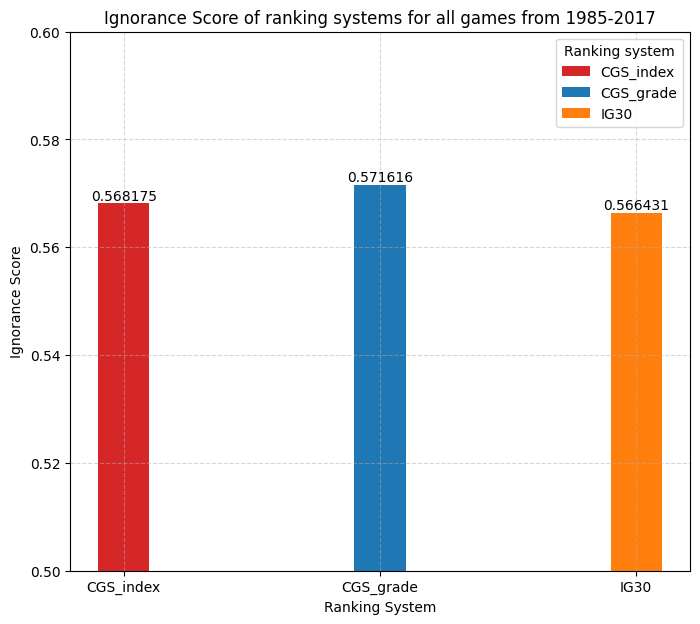

In [124]:
#Visualisation of results
#all index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([log_allidx,log_allgrade,log_allIG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Ignorance Score')
ax.set_title('Ignorance Score of ranking systems for all games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.5,0.6)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

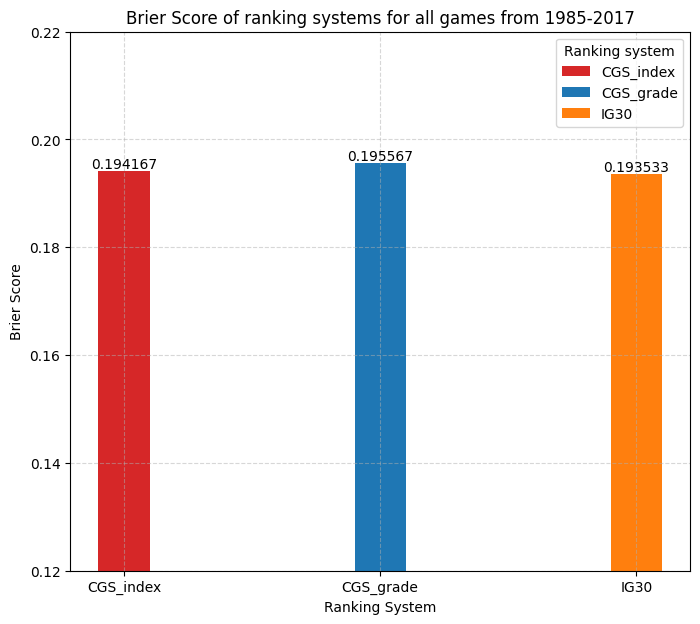

In [125]:
#all index vs grade vs IG30 brier
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([brier_allidx,brier_allgrade,brier_allIG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Brier Score')
ax.set_title('Brier Score of ranking systems for all games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.12,0.22)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

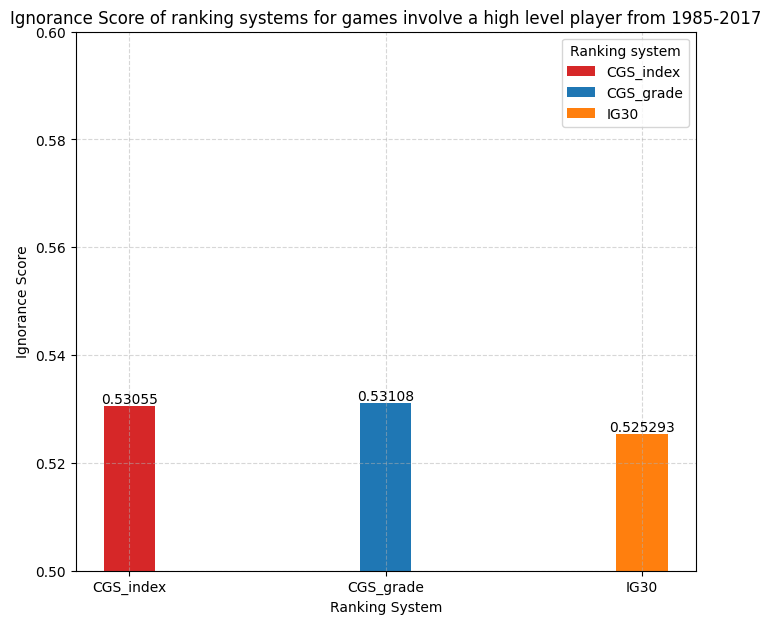

In [126]:
#HL index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([log_HLidx,log_HLgrade,log_HLIG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Ignorance Score')
ax.set_title('Ignorance Score of ranking systems for games involve a high level player from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.5,0.6)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

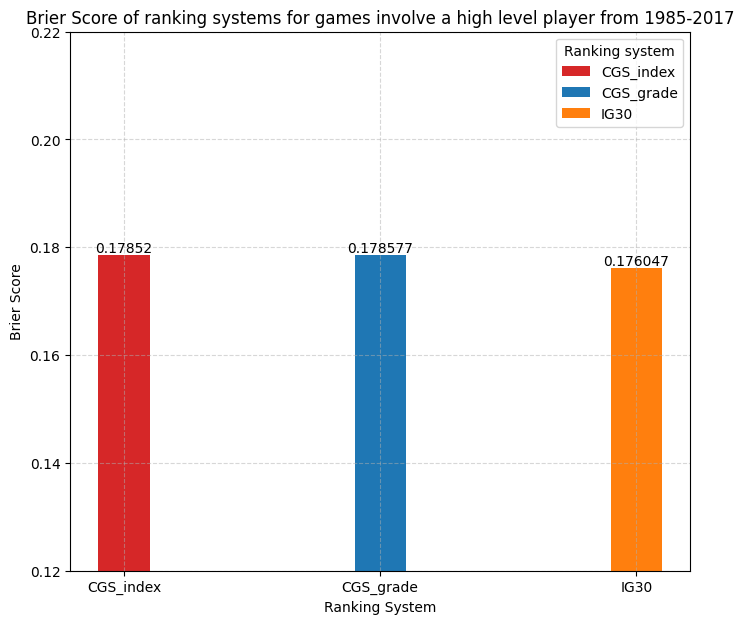

In [127]:
#HL index vs grade vs IG30 brier
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([brier_HLidx,brier_HLgrade,brier_HLIG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Brier Score')
ax.set_title('Brier Score of ranking systems for games involve a high level player from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.12,0.22)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

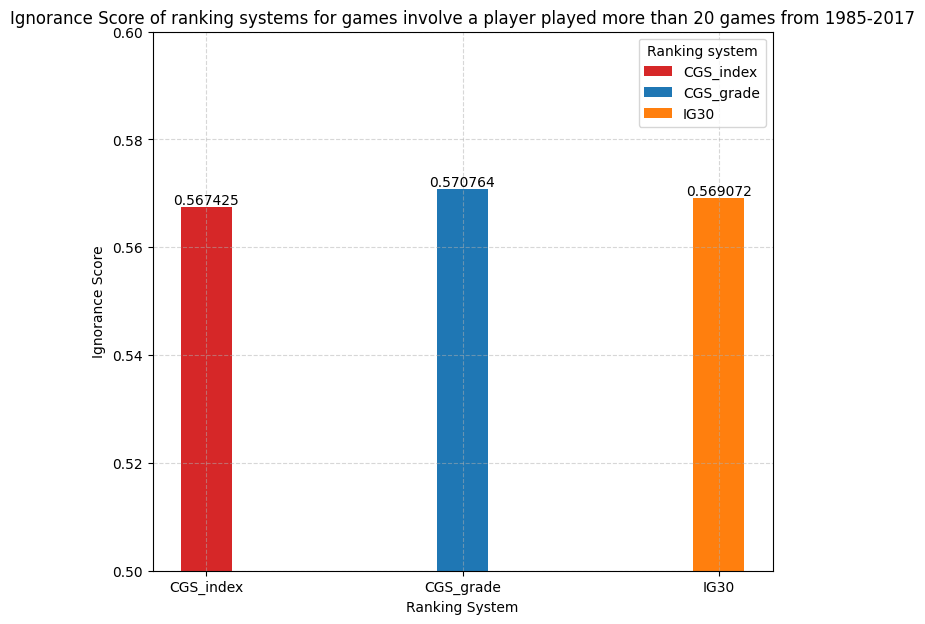

In [128]:
#Frequency20 index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([log_fre20idx,log_fre20grade,log_fre20IG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Ignorance Score')
ax.set_title('Ignorance Score of ranking systems for games involve a player played more than 20 games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.5,0.6)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

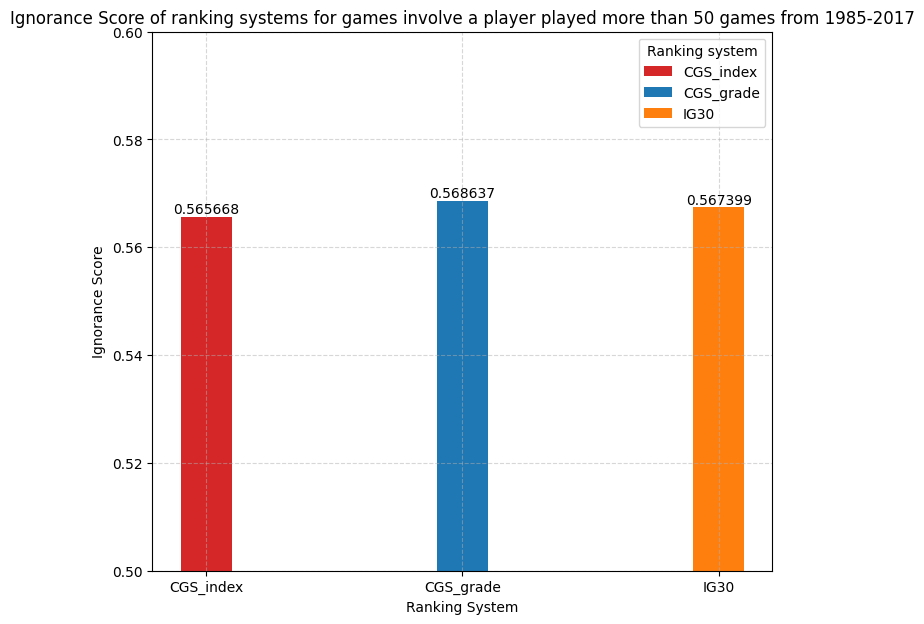

In [129]:
#Frequency50 index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([log_fre50idx,log_fre50grade,log_fre50IG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Ignorance Score')
ax.set_title('Ignorance Score of ranking systems for games involve a player played more than 50 games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.5,0.6)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

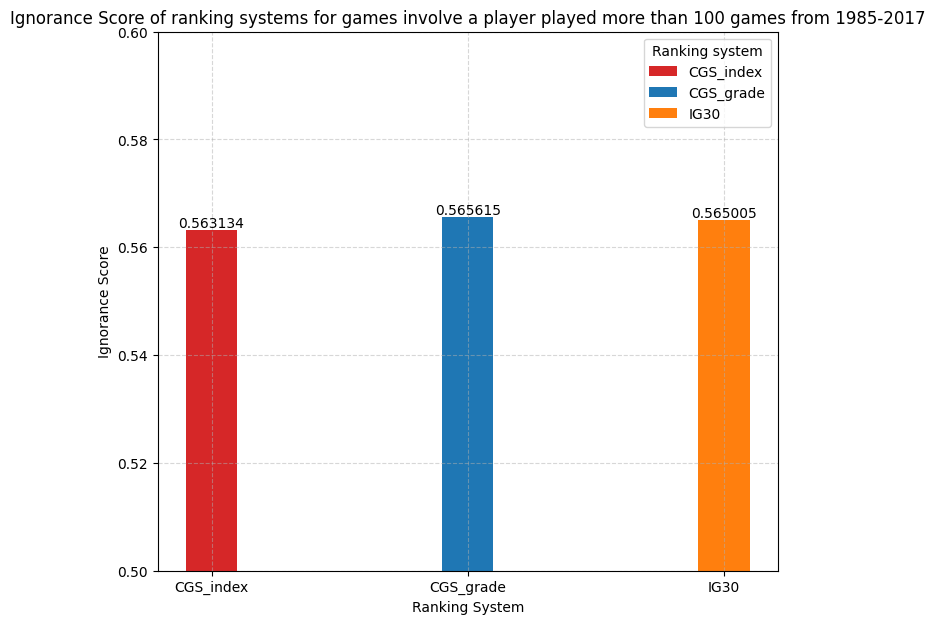

In [130]:
#Frequency100 index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([log_fre100idx,log_fre100grade,log_fre100IG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Ignorance Score')
ax.set_title('Ignorance Score of ranking systems for games involve a player played more than 100 games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.5,0.6)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

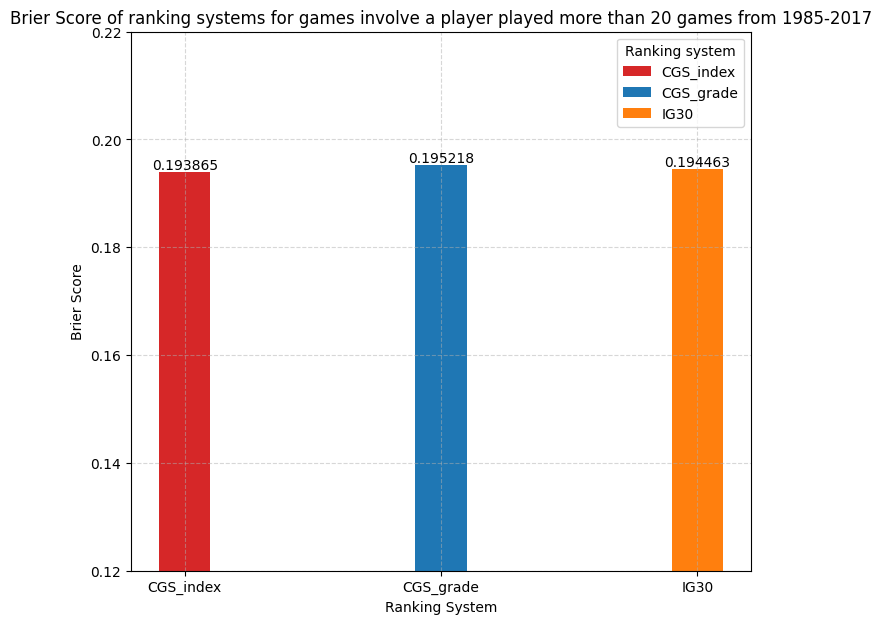

In [131]:
#Frequency20 index vs grade vs IG30 brier
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([brier_fre20idx,brier_fre20grade,brier_fre20IG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Brier Score')
ax.set_title('Brier Score of ranking systems for games involve a player played more than 20 games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.12,0.22)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

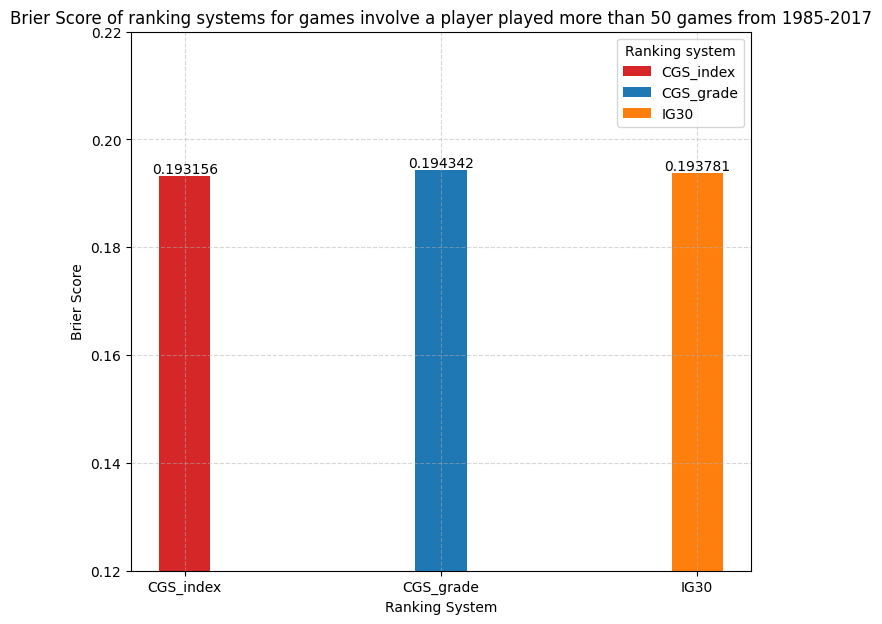

In [132]:
#Frequency50 index vs grade vs IG30 brier
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([brier_fre50idx,brier_fre50grade,brier_fre50IG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Brier Score')
ax.set_title('Brier Score of ranking systems for games involve a player played more than 50 games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.12,0.22)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

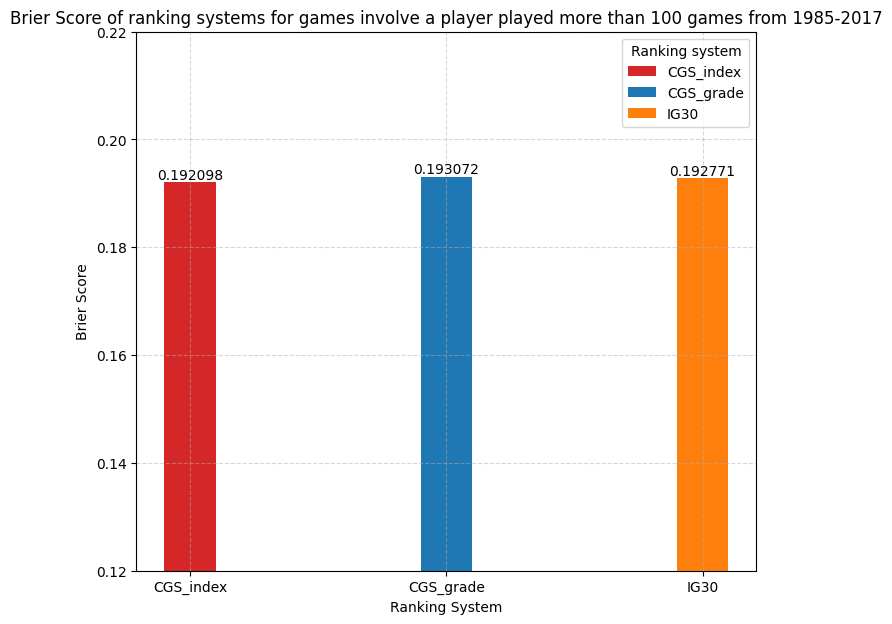

In [133]:
#Frequency100 index vs grade vs IG30 brier
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([brier_fre100idx,brier_fre100grade,brier_fre100IG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Brier Score')
ax.set_title('Brier Score of ranking systems for games involve a player played more than 100 games from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.12,0.22)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

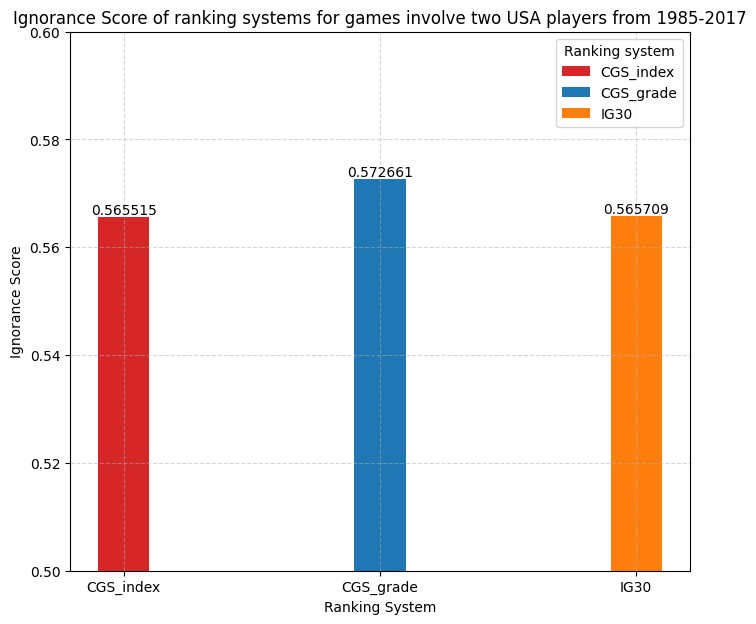

In [134]:
#Region index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([log_USAidx,log_USAgrade,log_USAIG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Ignorance Score')
ax.set_title('Ignorance Score of ranking systems for games involve two USA players from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.5,0.6)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

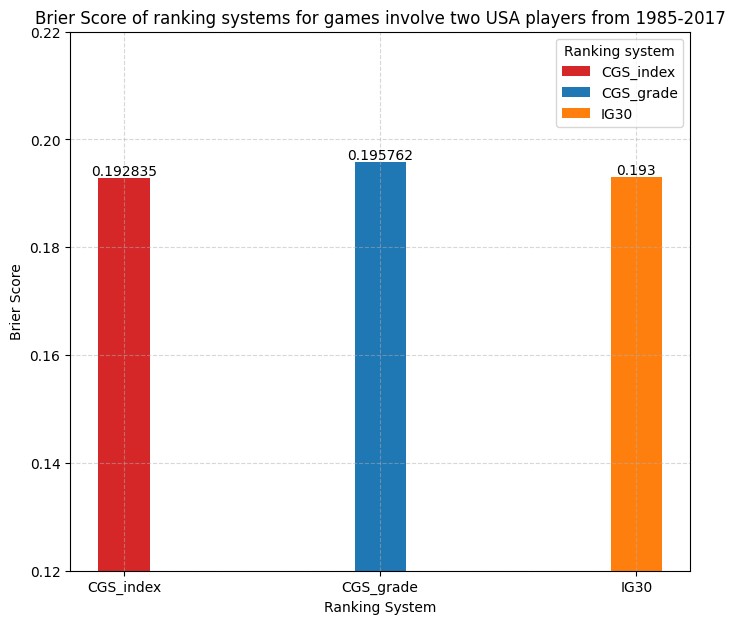

In [135]:
#Region index vs grade vs IG30 log
fig, ax = plt.subplots()
x = np.array(['CGS_index','CGS_grade','IG30'])
y = np.array([brier_USAidx,brier_USAgrade,brier_USAIG30])


bar_labels = ['CGS_index', 'CGS_grade',  'IG30']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2)
ax.set_xlabel('Ranking System')
ax.set_ylabel('Brier Score')
ax.set_title('Brier Score of ranking systems for games involve two USA players from 1985-2017')
ax.legend(title='Ranking system')

fig.set_size_inches(8,7)
plt.ylim(0.12,0.22)
plt.grid(ls="--", alpha=0.5)

plt.bar_label(plt.bar(x, y, label=bar_labels, color=bar_colors,width = 0.2), label_type='edge')

plt.show()

Text(0.5, 1.0, 'CGS index')

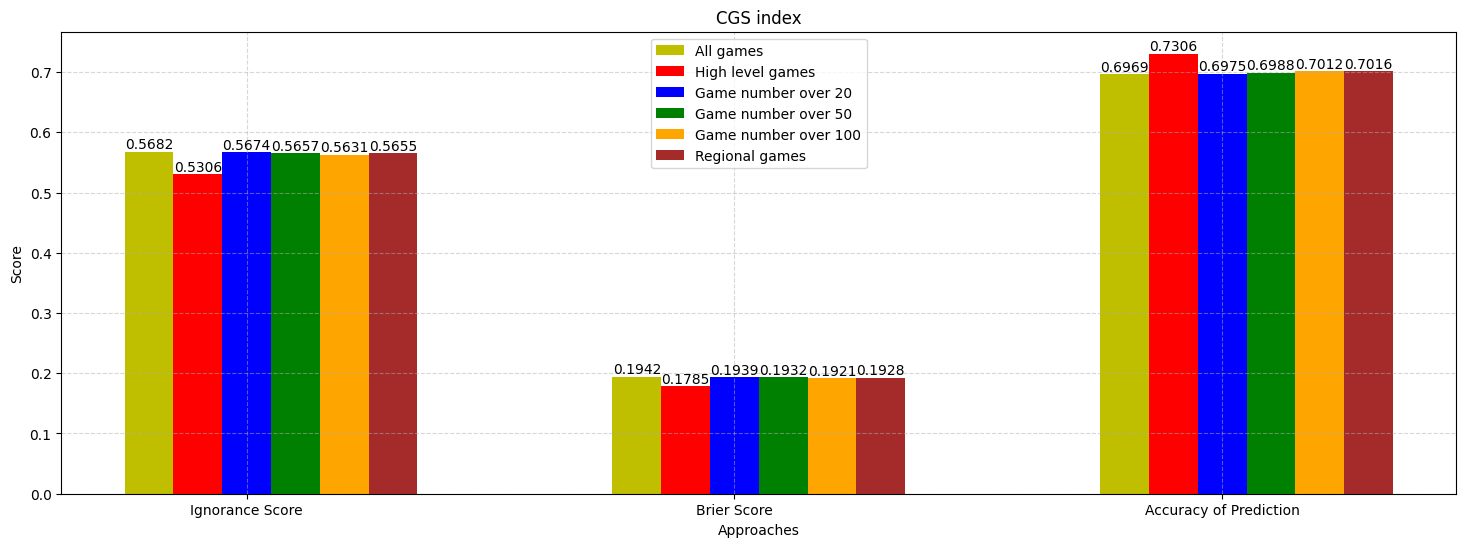

In [136]:
#Plot for CGS index comparison
all = [log_allidx,brier_allidx,pred_allidx]
HL = [log_HLidx,brier_HLidx,pred_HLidx]
fre20 = [log_fre20idx,brier_fre20idx,pred_fre20_idx]
fre50 = [log_fre50idx,brier_fre50idx,pred_fre50_idx]
fre100 = [log_fre100idx,brier_fre100idx,pred_fre100_idx]
USA = [log_USAidx,brier_USAidx,pred_USA_idx]
name_list = ['Ignorance Score','Brier Score','Accuracy of Prediction']
x = list(range(len(name_list)))
total_width, n = 0.5, 5
width = total_width / n
plt.figure(figsize=(18, 6))
plt.bar(x, all, width=width, label='All games', fc='y')
plt.bar_label(plt.bar(x, [round(i,4) for i in all], width=width, fc='y'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, HL, width=width, label='High level games', fc='r')
plt.bar_label(plt.bar(x, [round(i,4) for i in HL], width=width, fc='r'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre20, width=width, label='Game number over 20', tick_label=name_list, fc='b')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre20], width=width, fc='b'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre50, width=width, label='Game number over 50', fc='g')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre50], width=width, fc='g'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre100, width=width, label='Game number over 100', fc='orange')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre100], width=width, fc='orange'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, USA, width=width, label='Regional games', fc='brown')
plt.bar_label(plt.bar(x, [round(i,4) for i in USA], width=width, fc='brown'), label_type='edge')

plt.grid(ls="--", alpha=0.5)
plt.legend()
plt.xlabel('Approaches')
plt.ylabel('Score')
plt.title('CGS index')



Text(0.5, 1.0, 'CGS grade')

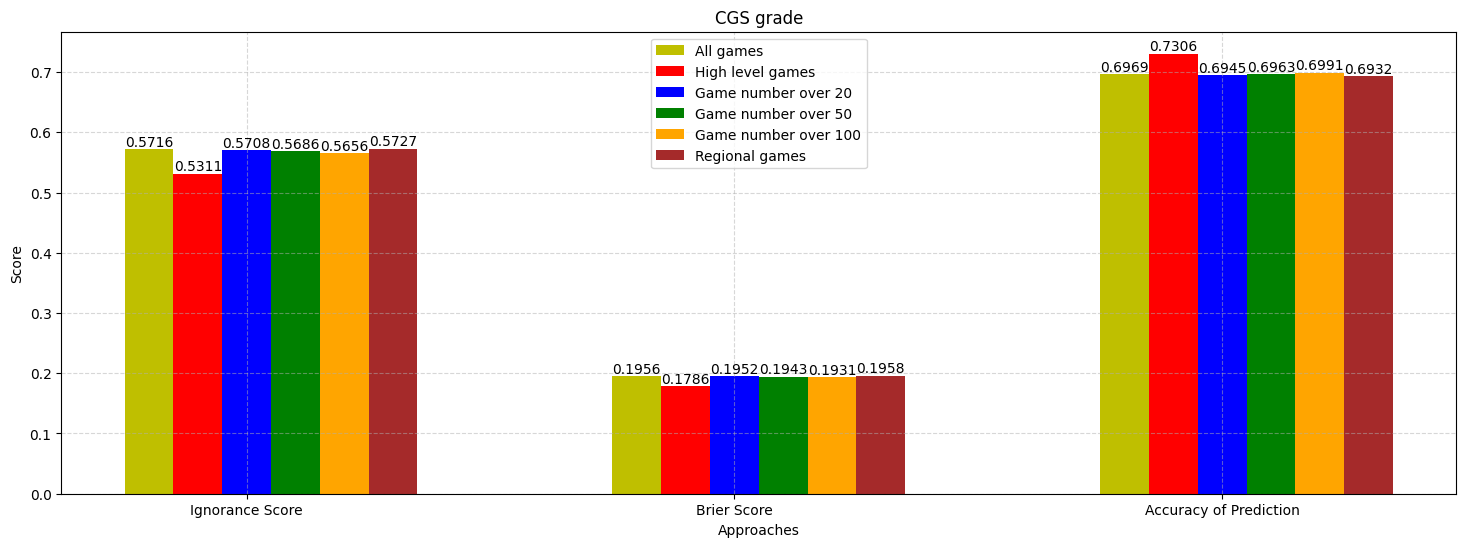

In [137]:
#Plot for CGS grade comparison
all = [log_allgrade,brier_allgrade,pred_allgrade]
HL = [log_HLgrade,brier_HLgrade,pred_HLgrade]
fre20 = [log_fre20grade,brier_fre20grade,pred_fre20_grade]
fre50 = [log_fre50grade,brier_fre50grade,pred_fre50_grade]
fre100 = [log_fre100grade,brier_fre100grade,pred_fre100_grade]
USA = [log_USAgrade,brier_USAgrade,pred_USA_grade]

name_list = ['Ignorance Score','Brier Score','Accuracy of Prediction']
x = list(range(len(name_list)))
total_width, n = 0.5, 5
width = total_width / n
plt.figure(figsize=(18, 6))
plt.bar(x, all, width=width, label='All games', fc='y')
plt.bar_label(plt.bar(x, [round(i,4) for i in all], width=width, fc='y'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, HL, width=width, label='High level games', fc='r')
plt.bar_label(plt.bar(x, [round(i,4) for i in HL], width=width, fc='r'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre20, width=width, label='Game number over 20', tick_label=name_list, fc='b')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre20], width=width, fc='b'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre50, width=width, label='Game number over 50', fc='g')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre50], width=width, fc='g'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre100, width=width, label='Game number over 100', fc='orange')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre100], width=width, fc='orange'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, USA, width=width, label='Regional games', fc='brown')
plt.bar_label(plt.bar(x, [round(i,4) for i in USA], width=width, fc='brown'), label_type='edge')

plt.grid(ls="--", alpha=0.5)
plt.legend()
plt.xlabel('Approaches')
plt.ylabel('Score')
plt.title('CGS grade')

Text(0.5, 1.0, 'IG30')

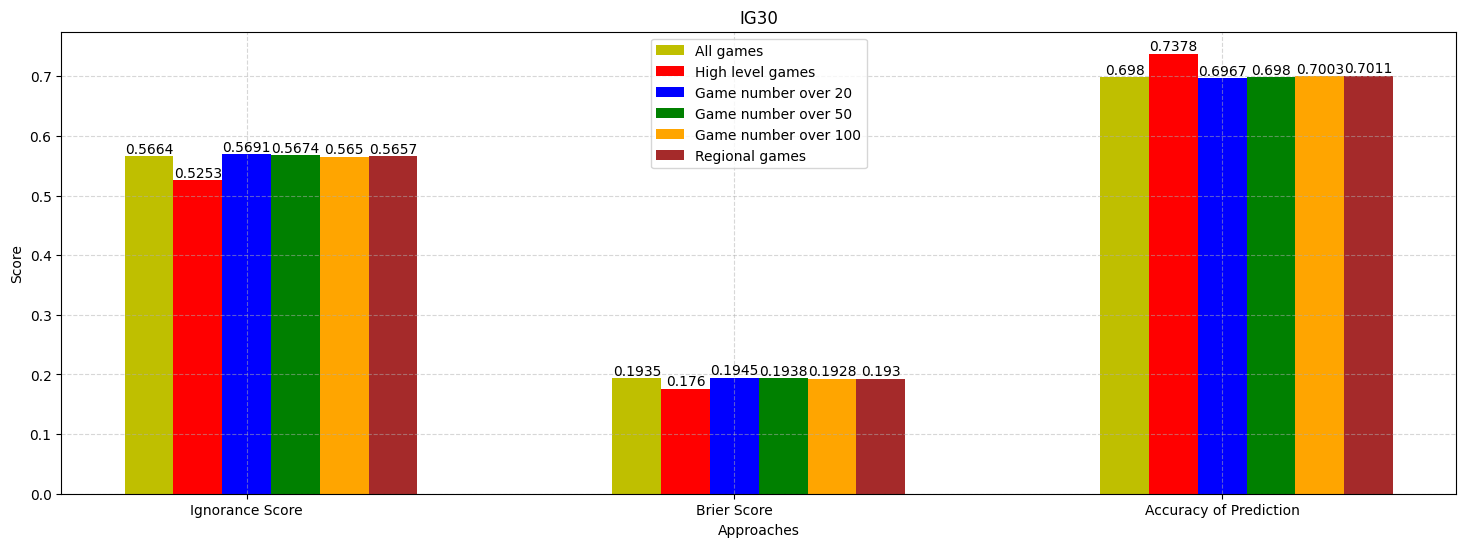

In [138]:
#Plot for IG30 comparison
all = [log_allIG30,brier_allIG30,pred_IG30]
HL = [log_HLIG30,brier_HLIG30,pred_HLIG30]
fre20 = [log_fre20IG30,brier_fre20IG30,pred_fre20_IG30]
fre50 = [log_fre50IG30,brier_fre50IG30,pred_fre50_IG30]
fre100 = [log_fre100IG30,brier_fre100IG30,pred_fre100_IG30]
USA = [log_USAIG30, brier_USAIG30,pred_USAIG30]
name_list = ['Ignorance Score','Brier Score','Accuracy of Prediction']
x = list(range(len(name_list)))
total_width, n = 0.5, 5
width = total_width / n
plt.figure(figsize=(18, 6))
plt.bar(x, all, width=width, label='All games', fc='y')
plt.bar_label(plt.bar(x, [round(i,4) for i in all], width=width, fc='y'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, HL, width=width, label='High level games', fc='r')
plt.bar_label(plt.bar(x, [round(i,4) for i in HL], width=width, fc='r'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre20, width=width, label='Game number over 20', tick_label=name_list, fc='b')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre20], width=width, fc='b'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre50, width=width, label='Game number over 50', fc='g')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre50], width=width, fc='g'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, fre100, width=width, label='Game number over 100', fc='orange')
plt.bar_label(plt.bar(x, [round(i,4) for i in fre100], width=width, fc='orange'), label_type='edge')

for i in range(len(x)):
	x[i] = x[i] + width
plt.bar(x, USA, width=width, label='Regional games', fc='brown')
plt.bar_label(plt.bar(x, [round(i,4) for i in USA], width=width, fc='brown'), label_type='edge')

plt.grid(ls="--", alpha=0.5)
plt.legend()
plt.xlabel('Approaches')
plt.ylabel('Score')
plt.title('IG30')